### Portfolio Analysis based on your Risk Aversion level and timeframe
We have 3 levels of Risk Aversion, with level 3 being the most aggressive
We have 3 timeframes for which we will do our Monte Carlo forecasts: 5, 10, and 20 years.

In [1]:
# Import the required libraries and dependencies
#import questionary   #Tried to include this and didn't work
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
#Tried to use questionary straight up like we did in VS Code and didn't like it.
#risk_tolerance = questionary.text("Please select your risk tolerance level from 1-3, 3 being the most aggressive").ask()

In [4]:
# We'll assume 100 shares in each stock of interest

#Briggs let's make this part of what stocks to use dynamic depending on if client selects 
#level 1 2 3 risk tolerance.  Since this is Nev's set we'll assume this is Level 2 for now.
fb_shares = 100  #FB
aapl_shares = 100 #AAPL
tsla_shares = 100 #TSLA
rdsa_shares = 100 #RDS.A  shell oil
gs_shares = 100 #GS


In [5]:
# Set the variables for the Alpaca API and secret keys. Will be making calls for historical prices.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


str

str

In [6]:
# Set the tickers for both the bond and stock portion of the portfolio

#This setting of tickers will also need to be made a bit more dynamic again dep on what client selects
#We know this would be risk tolerance level 2 based on Nev's list.
tickers = ["FB","AAPL","TSLA","RDS.A","GS"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-10-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-27", tz="America/New_York").isoformat()
limit_rows = 1000
#We can possibly make this start and end date a bit more dynamic by just pulling today's or yesterday's
#date and feeding in here as a variable.

In [7]:
# We use the Alpaca get_barset function to get current closing prices for our portfolio of 5 tickers
prices_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=limit_rows).df

# checking dataframe to make sure everything looks ok for our closes
prices_df.head()


AAPL                                        FB  \
                             open    high     low   close    volume    open   
time                                                                          
2021-10-27 00:00:00-04:00  149.38  149.73  148.49  148.85  43201783  314.11   

                                                             ... RDS.A         \
                             high     low   close    volume  ...  open   high   
time                                                         ...                
2021-10-27 00:00:00-04:00  319.25  312.06  312.22  27016319  ...  48.6  50.75   

                                                      TSLA                    \
                             low  close    volume     open     high      low   
time                                                                           
2021-10-27 00:00:00-04:00  48.37  49.97  16569596  1038.78  1070.88  1030.78   

                                           
                          close    volume  
time                                       
2021-10-27 00:00:00-04:00  1038  35678056  

[1 rows x 25 columns]

In [8]:
# Access the closing prices for our 5 tickers from the Alpaca DataFrame
# We also convert the value to a floating point number
#Again will need to be made dynamic depending on if level 1 2 or 3 risk tolerance level is selected
fb_close_price = float(prices_df["FB"]["close"])
aapl_close_price = float(prices_df["AAPL"]["close"])
tsla_close_price = float(prices_df["TSLA"]["close"])
rdsa_close_price = float(prices_df["RDS.A"]["close"])
gs_close_price = float(prices_df["GS"]["close"])

# Print the AGG closing price
display(fb_close_price)
display(aapl_close_price)
display(tsla_close_price)
display(rdsa_close_price)
display(gs_close_price)


312.22

148.85

1038.0

49.97

411.06

In [9]:
# Calculate the current value of the bond portion of the portfolio
#Again will need to be made dynamic depending on if level 1 2 or 3 risk tolerance level is selected
fb_value = fb_shares * fb_close_price
aapl_value = aapl_shares * aapl_close_price
tsla_value = tsla_shares * tsla_close_price
rdsa_value = rdsa_shares * rdsa_close_price
gs_value = gs_shares * gs_close_price

# Print the current value of the bond portfolio
print(f"The current value of your Facebook holding is ${fb_value:.2f}")
print(f"The current value of your Apple holding is ${aapl_value:.2f}")
print(f"The current value of your Tesla holding is ${tsla_value:.2f}")
print(f"The current value of your Shell holding is ${rdsa_value:.2f}")
print(f"The current value of your Goldman Sachs holding is ${gs_value:.2f}")


The current value of your Facebook holding is $31222.00
The current value of your Apple holding is $14885.00
The current value of your Tesla holding is $103800.00
The current value of your Shell holding is $4997.00
The current value of your Goldman Sachs holding is $41106.00


In [10]:
# Calculate the total value of the entire portfolio
portfolio_value =  fb_value + aapl_value + tsla_value + rdsa_value + gs_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of your total portfolio holding is ${portfolio_value:.2f}")



The current value of your total portfolio holding is $196010.00


In [11]:
# Set start and end dates of 10 years back from your current date
#We'll always assume 10 years back. Again we can make this dynamic if we want
#and start with yesterday's date and then go back 10 years.
start_date = pd.Timestamp("2011-10-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-28", tz="America/New_York").isoformat()

limit_rows = 1000

In [12]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(prices_df.head(2))
display(prices_df.tail(2))
tickers

AAPL                         FB                 \
                          open high low close volume open high low close   
time                                                                       
2017-10-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2017-10-17 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   

                                  ...  RDS.A                                   \
                          volume  ...   open   high    low   close     volume   
time                              ...                                           
2017-10-16 00:00:00-04:00    NaN  ...  61.24  61.29  60.87  60.875  2191500.0   
2017-10-17 00:00:00-04:00    NaN  ...  60.98  60.99  60.49  60.690  2042981.0   

                          TSLA                        
                          open high low close volume  
time                                                  
2017-10-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  
2017-10-17 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  

[2 rows x 25 columns]

AAPL                                         \
                             open     high     low     close      volume   
time                                                                       
2021-10-27 00:00:00-04:00  149.38  149.730  148.49  148.8500  43068962.0   
2021-10-28 00:00:00-04:00  149.86  153.165  149.72  152.4766  77772052.0   

                               FB                                      ...  \
                             open    high     low   close      volume  ...   
time                                                                   ...   
2021-10-27 00:00:00-04:00  314.11  319.25  312.06  312.22  27016324.0  ...   
2021-10-28 00:00:00-04:00  312.81  325.52  308.11  316.82  48061660.0  ...   

                          RDS.A                                          TSLA  \
                           open     high      low  close      volume     open   
time                                                                            
2021-10-27 00:00:00-04:00  48.6  50.7500  48.3700  49.97  16561341.0  1038.78   
2021-10-28 00:00:00-04:00  48.0  48.0608  46.8114  47.44  12632678.0  1068.03   

                                                                  
                              high      low    close      volume  
time                                                              
2021-10-27 00:00:00-04:00  1070.88  1030.78  1038.00  35678057.0  
2021-10-28 00:00:00-04:00  1081.00  1054.20  1077.09  24517641.0  

[2 rows x 25 columns]

['FB', 'AAPL', 'TSLA', 'RDS.A', 'GS']

###Here we run a Monte Carlo simulation of 1000 samples and the time frame could be 5, 10, or 20 years depending on the user's response. We always will assume equal 20% weight for each stock in the portfolio.

In [13]:
# Configure the Monte Carlo simulation to forecast cumulative returns based on the client's input
# The weights we will assume will be split evenly 20 percent for each ticker.
# We will be running 1000 samples.
#This part will only change based on if client selects 5 10 or 20 years to do the forecast.
MC_20All = MCSimulation(
    portfolio_data = prices_df,
    weights = [0.2,0.2,0.2,0.2,0.2],
    num_simulation = 1000,
    num_trading_days = 252*10  #This number 10 will need to be made a variable based off client's input
)

# Review the simulation input data
MC_20All.portfolio_data.head()


AAPL                                      FB       \
                          open high low close volume daily_return open high   
time                                                                          
2017-10-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-17 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-18 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-19 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   

                                     ...  RDS.A                     \
                          low close  ...    low   close     volume   
time                                 ...                             
2017-10-16 00:00:00-04:00 NaN   NaN  ...  60.87  60.875  2191500.0   
2017-10-17 00:00:00-04:00 NaN   NaN  ...  60.49  60.690  2042981.0   
2017-10-18 00:00:00-04:00 NaN   NaN  ...  60.43  60.530  2460564.0   
2017-10-19 00:00:00-04:00 NaN   NaN  ...  60.81  61.040  2857213.0   
2017-10-20 00:00:00-04:00 NaN   NaN  ...  60.92  61.070  2174961.0   

                                       TSLA                                     
                          daily_return open high low close volume daily_return  
time                                                                            
2017-10-16 00:00:00-04:00          NaN  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-17 00:00:00-04:00    -0.003039  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-18 00:00:00-04:00    -0.002636  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-19 00:00:00-04:00     0.008426  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-20 00:00:00-04:00     0.000491  NaN  NaN NaN   NaN    NaN          NaN  

[5 rows x 30 columns]

In [14]:
# Run the Monte Carlo simulation to forecast client specified number of years of cumulative returns
MC_20All.calc_cumulative_return()

#Tweaked monte carlo py file to spit out a message every 200 simulations.

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 600.
Running Monte Carlo simulation number 800.


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992673,1.024811,1.008725,0.976876,1.011420,0.975457,1.006225,1.007688,1.014730,0.992688,...,0.994093,1.015983,1.025753,0.995253,1.006551,0.993068,0.993037,0.989425,0.987039,1.012335
2,0.983018,1.031763,1.014640,0.996531,1.007603,0.970311,1.044875,1.019257,1.013820,0.972510,...,0.993261,1.020056,1.036565,0.967511,1.002760,0.996130,1.000740,0.986232,0.982679,1.006013
3,0.988811,1.033268,1.028127,0.997932,0.990441,0.957806,1.035221,1.018054,1.020924,0.996720,...,1.003524,1.022492,1.047846,0.983791,1.004102,1.011703,1.013230,0.999741,0.999316,0.980563
4,1.006002,1.026851,1.021265,1.000357,0.991214,0.946783,1.029625,1.018988,1.024233,1.002825,...,1.001762,1.011262,1.035157,0.980483,0.998961,1.000181,0.998815,1.012051,1.002071,0.969267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.615844,7.295075,13.678985,5.522824,7.919462,13.559436,14.128230,4.919952,7.160557,19.273457,...,10.790528,16.297400,5.208245,26.048564,5.574955,16.055517,45.290559,13.495030,11.368032,6.201402
2517,7.385678,7.132835,13.704992,5.533979,7.805249,13.479431,14.381203,4.964445,7.149314,19.479723,...,10.975264,16.239722,5.379601,25.667309,5.740138,16.051163,45.361086,13.361847,11.550772,6.101079
2518,7.496045,7.217528,13.664230,5.606996,7.662126,13.313108,14.400688,4.952530,7.224416,19.597868,...,10.843605,15.702296,5.549969,25.818821,5.742570,16.250813,46.086733,13.322581,11.775772,6.170104
2519,7.369287,7.173105,13.775854,5.575410,7.558583,13.365515,14.404639,4.850778,7.319491,19.656256,...,10.768405,15.273170,5.527970,26.276378,5.897734,15.968196,45.593610,13.275827,11.987567,6.139049


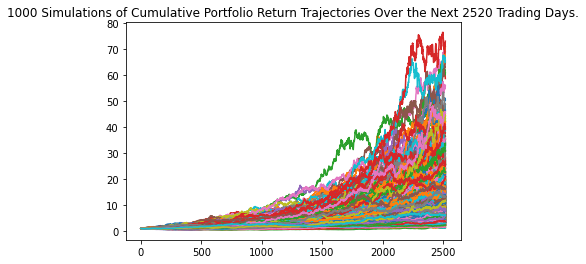

In [15]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
weight_20All_plot = MC_20All.plot_simulation()


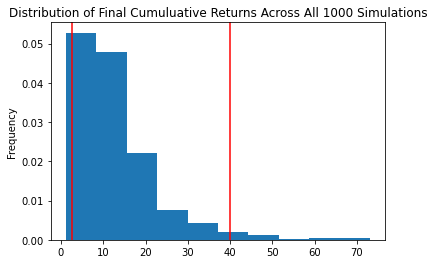

In [16]:
# Here we visualize the probability distribution of the Monte Carlo simulation 
# based on the user's timeframe by plotting a histogram
distribution_20All_plot = MC_20All.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [17]:
# Generate summary statistics from the Monte Carlo simulation results
# We save the results as a variable
weight_20All_table = MC_20All.summarize_cumulative_return()


# Review the Client's Monte Carlo summary statistics
print(weight_20All_table)

count           1000.000000
mean              12.968068
std                9.719823
min                1.127377
25%                6.407075
50%               10.328733
75%               16.384285
max               73.143157
95% CI Lower       2.706881
95% CI Upper      39.917354
Name: 2520, dtype: float64


In [18]:
# We re-print the current balance of the total portfolio of the client
print(f"The current value of your total portfolio holding is ${portfolio_value:.2f}")

#Will leave this up to the group. We can just say hey this is the portfolio holding value
#or we can also break it down by individual stock holding like we did above.

print("______________________________________")


The current value of your total portfolio holding is $196010.00
______________________________________


In [19]:
# We now use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes 
#for the current client portfolio
ci_lower_thirty_cumulative_return = round(weight_20All_table[8]*portfolio_value,2)
ci_upper_thirty_cumulative_return = round(weight_20All_table[9]*portfolio_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${portfolio_value:.2f} in the portfolio with an "
      f"even 20% weight in each stock over the next 10 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that the current value of $196010.00 in the portfolio with an even 20% weight in each stock over the next 10 years will end within the range of $530575.7 and $7824200.48.
